In [2]:
#High oxidized nitrogen = pollution.
#It can cause eutrophication (Algae blooms, Oxygen depletion in water, Fish and aquatic life die-offs)
#Unsafe for drinking at high levels → can cause health risks.

import pandas as pd

# Load Oxidised Nitrogen data
nitrate_df = pd.read_csv('oxidized_nitrogen.csv', sep=';', low_memory=False)  # handle mixed types warning

# See what columns are available
print(nitrate_df.columns)


Index(['GEMS.Station.Number', 'Sample.Date', 'Sample.Time', 'Depth',
       'Parameter.Code', 'Analysis.Method.Code', 'Value.Flags', 'Value',
       'Unit', 'Data.Quality'],
      dtype='object')


In [3]:
import plotly.express as px

# Load oxidized nitrogen data
nitrate_df = pd.read_csv('oxidized_nitrogen.csv', sep=';', low_memory=False)

# Load station metadata (this has the country info)
station_metadata = pd.read_csv('GEMStat_station_metadata.csv', sep=';', encoding='ISO-8859-1')

# Clean column names just in case
nitrate_df.columns = nitrate_df.columns.str.strip()
station_metadata.columns = station_metadata.columns.str.strip()

# Merge based on 'GEMS.Station.Number'
#for country purpose
merged = pd.merge(nitrate_df, station_metadata, how='left', left_on='GEMS.Station.Number', right_on='GEMS Station Number')


# Group by country and calculate mean Value
nitrate_by_country = merged.groupby('Country Name')['Value'].mean().reset_index()

# plot a Choropleth map
fig = px.choropleth(
    nitrate_by_country,
    locations='Country Name',
    locationmode='country names',
    color='Value',
    color_continuous_scale='Viridis',
    title='Average Oxidized Nitrogen Levels by Country'
)

fig.show()

fig.write_html("nitrate_choropleth.html", include_plotlyjs='cdn')





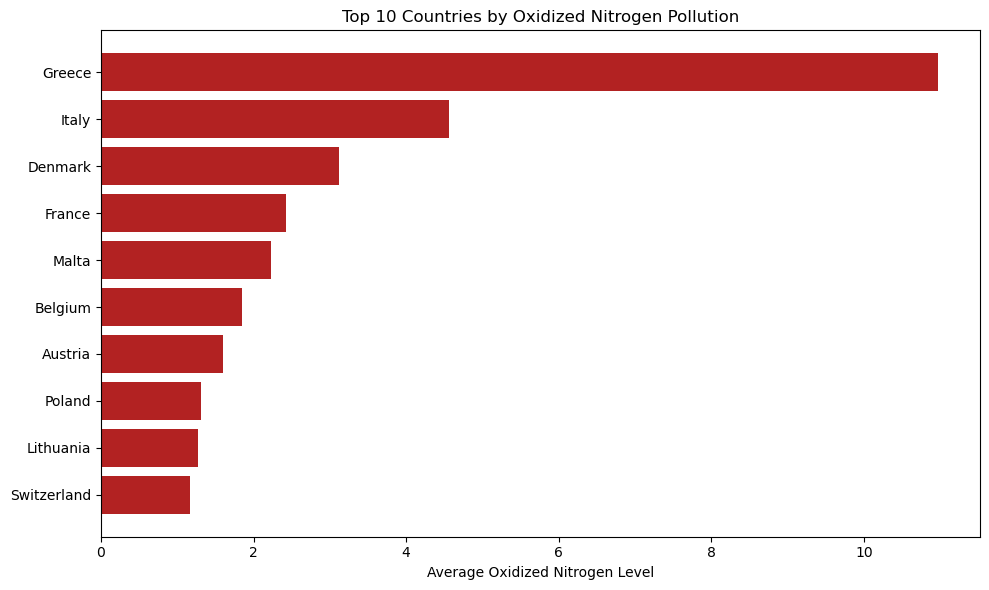

In [4]:

import matplotlib.pyplot as plt

top10 = nitrate_by_country.sort_values(by='Value', ascending=False).head(10)

# Bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10['Country Name'], top10['Value'], color='firebrick')
plt.xlabel('Average Oxidized Nitrogen Level')
plt.title('Top 10 Countries by Oxidized Nitrogen Pollution')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


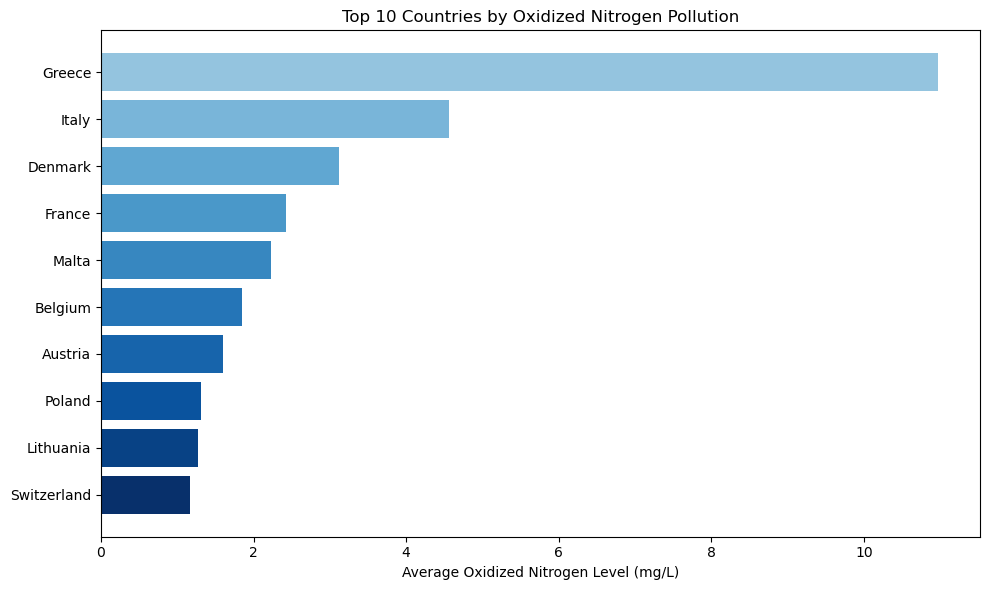

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

top10 = nitrate_by_country.sort_values(by='Value', ascending=False).head(10)

# Create a color range from dark blue to light blue
colors = cm.Blues(np.linspace(0.4, 1, len(top10)))  # 0.4 is darker, 1 is lighter

# Bar chart
plt.figure(figsize=(10, 6))
plt.barh(top10['Country Name'], top10['Value'], color=colors)
plt.xlabel('Average Oxidized Nitrogen Level (mg/L)')
plt.title('Top 10 Countries by Oxidized Nitrogen Pollution')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


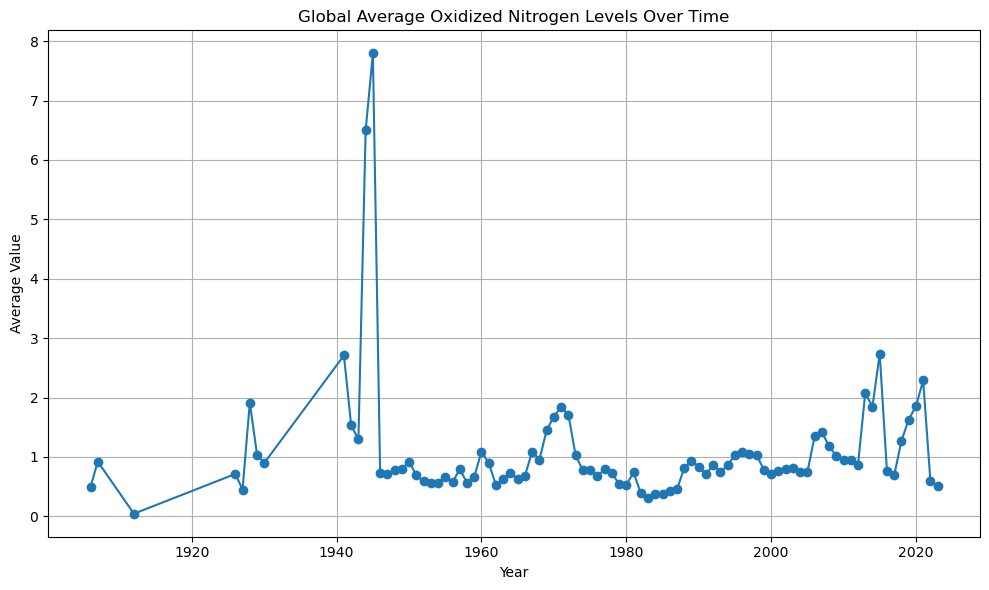

In [5]:
# Group by year
nitrate_df['Year'] = pd.to_datetime(nitrate_df['Sample.Date']).dt.year
trend = nitrate_df.groupby('Year')['Value'].mean().reset_index()

# Line chart
plt.figure(figsize=(10,6))
plt.plot(trend['Year'], trend['Value'], marker='o')
plt.title('Global Average Oxidized Nitrogen Levels Over Time')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.tight_layout()
plt.show()
